                                                
                                                ARUN CHANDRA K HR ANALYTICS KAGGLE

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv("C:/Users/Administrator/Documents/Arun_ML/HR analytics/HR_comma_sep.csv")

In [2]:
dataset.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [3]:
dataset.shape

(14999, 10)

In [4]:
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
#Exploratory data analysis

dataset.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
dataset['left'].value_counts()
# So, the number of people left are 3571

0    11428
1     3571
Name: left, dtype: int64

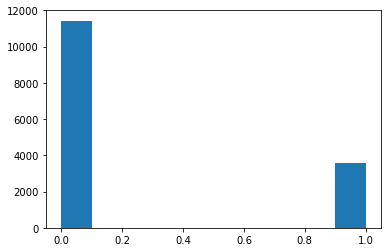

In [7]:
import matplotlib.pyplot as plt
plt.hist(dataset['left'])
plt.show()

In [8]:
dataset['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [9]:
dataset['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

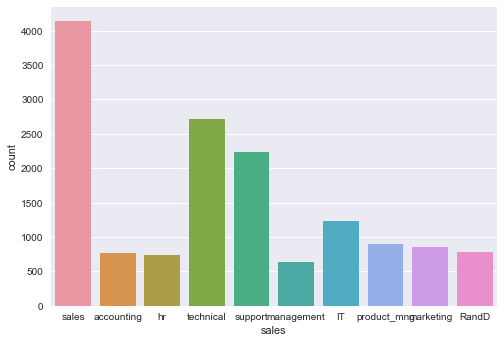

In [10]:
import seaborn as sns
sns.countplot(x="sales", data=dataset)
plt.show()
#So from the below picture we can analyze that most of the employees is dataset are in Sales department

<function matplotlib.pyplot.show>

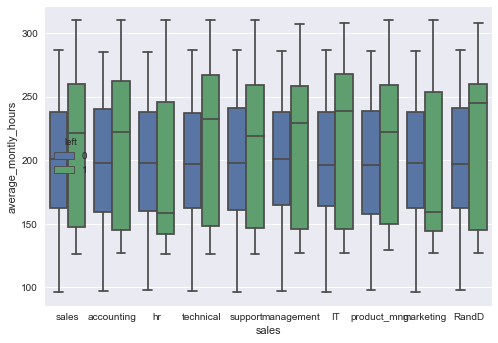

In [11]:
sns.boxplot(x = "sales", y = "average_montly_hours" , hue = 'left',data = dataset)
plt.show
#Unable to interpret anything from this

<function matplotlib.pyplot.show>

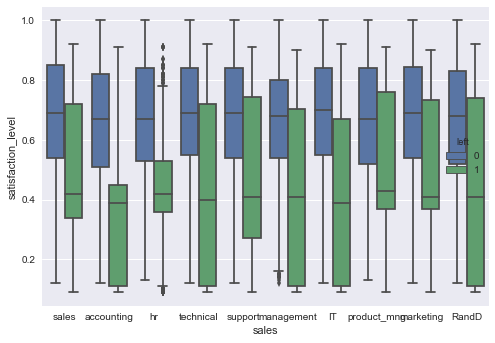

In [12]:
sns.boxplot(x = "sales", y = "satisfaction_level" , hue = 'left',data = dataset)
plt.show
# So from the below plot it is very evident that people with less satisfaction level are leaving the Company

<function matplotlib.pyplot.show>

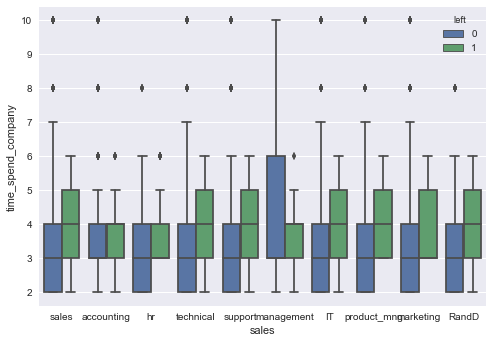

In [13]:
sns.boxplot(x = "sales", y = "time_spend_company" , hue = 'left',data = dataset)
plt.show
# Seems to have some outliers in time_spend_comany 

In [14]:
data = dataset.copy()

In [15]:
# Two of the attributes are Categorical so performing Label encoding along with One hot encoding 
from sklearn.preprocessing import StandardScaler, LabelEncoder
le=LabelEncoder()
for i in data:
    if data[i].dtype == 'object':
        le = LabelEncoder()
        le.fit(data[i].astype(str))
        temp = le.transform(data[i].astype(str))
        if temp.std() == 0:
            print("Dropped attributes with stddev == 0:" , i)
        else:
            one_hot = pd.get_dummies(data[i].astype(str))
            one_hot.columns=[(i+"_"+str(n)) for n in le.classes_]
            one_hot.drop(i +"_"+str(le.classes_[0]),inplace=True,axis=1)
            data = pd.concat([data,one_hot], axis = 1)
            print("Dropped attributes original data after One Hot encoding:", i)
        data.drop([i], inplace = True, axis = 1)

Dropped attributes original data after One Hot encoding: sales
Dropped attributes original data after One Hot encoding: salary


In [16]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [17]:
print("Shape of dataset before Onehot encoding", dataset.shape)
print("Shape of dataset after Onehot encoding", data.shape)

Shape of dataset before Onehot encoding (14999, 10)
Shape of dataset after Onehot encoding (14999, 19)


In [18]:
# So after one hot encoding i have converted the Categorical attributes into Numerical
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales_RandD', 'sales_accounting', 'sales_hr',
       'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_low',
       'salary_medium'],
      dtype='object')

In [19]:
target = ['left']
X = data.drop(target, axis = 1)
y = pd.DataFrame(data[target])


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [21]:
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
7042,0.53,0.97,3,189,3,0,0,0,0,0,0,0,0,1,0,0,1,0
8620,0.74,0.61,3,228,2,1,0,0,0,0,0,0,0,0,0,0,1,0
12949,0.68,0.84,3,270,3,0,0,0,0,0,0,0,0,0,1,0,0,0
13465,0.24,0.94,6,144,4,0,0,0,0,0,0,0,1,0,0,0,1,0
2322,0.77,0.93,4,171,2,0,0,0,0,1,0,0,0,0,0,0,0,1


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:

from sklearn.neural_network import MLPClassifier

In [25]:
# Selecting 4 layers with 100 neurons, 50 neurons, 10 neurons, 5 neurons
mlp = MLPClassifier(activation='relu', alpha=0.001, batch_size='auto',max_iter = 200, solver = 'adam',hidden_layer_sizes=(100,50,10,5))

In [26]:
mlp.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:904: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50, 10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [27]:
predictions = mlp.predict(X_test)

In [28]:

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[2842   52]
 [  74  782]]


In [29]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.97      0.98      0.98      2894
          1       0.94      0.91      0.93       856

avg / total       0.97      0.97      0.97      3750



In [30]:
len(mlp.coefs_)

5

In [31]:
len(mlp.coefs_[0])

18

In [32]:
len(mlp.intercepts_[0])

100